# I. Polynomial interpolation

Author: Yoann Pradat

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

plt.rcParams['text.usetex'] = True

## I.2. Interpolation values by polynomial order 6

In [2]:
n = 6 
TAU = [i for i in range(n)]
GTAU = [2*i-1 for i in range(n)]

D = GTAU[::]

In [3]:
for k in range(1, n):
    for i in range(n-k):
        D[i] = (D[i+1]-D[i])/(TAU[i+k]-TAU[i])

In [4]:
for x, g in zip(TAU, GTAU):
    pol = D[0]
    for k in range(1, n):
        pol = D[k] + pol*(x-TAU[k])
    print("Exact value %.2g vs approx value %.2g" % (g, pol))

Exact value -1 vs approx value -1
Exact value 1 vs approx value 1
Exact value 3 vs approx value 3
Exact value 5 vs approx value 5
Exact value 7 vs approx value 7
Exact value 9 vs approx value 9


## I.3. Interpolation sinus by polynomial order 6

In [5]:
n = 6
TAU = [0, 0, np.pi/4, np.pi/4, np.pi/2, np.pi/2]
div_diff = {k: np.zeros(n-k) for k in range(n)}

# Values are given
div_diff[0] = np.sin(TAU)

# 1st div diff are given for order 2 sites
for i in range(n-1):
    if div_diff[0][i+1] == div_diff[0][i]:
        div_diff[1][i] = np.cos(TAU[i+1])
    else:
        div_diff[1][i] = (div_diff[0][i+1]-div_diff[0][i])/(TAU[i+1]-TAU[i])
        
for k in range(2, n):
    for i in range(n-k):
        div_diff[k][i] = (div_diff[k-1][i+1]-div_diff[k-1][i])/(TAU[i+k]-TAU[i])

In [6]:
div_diff

{0: array([0.        , 0.        , 0.70710678, 0.70710678, 1.        ,
        1.        ]),
 1: array([1.00000000e+00, 9.00316316e-01, 7.07106781e-01, 3.72923229e-01,
        6.12323400e-17]),
 2: array([-0.12692121, -0.24600202, -0.42549571, -0.4748206 ]),
 3: array([-0.1516184 , -0.11426923, -0.0628024 ]),
 4: array([0.02377722, 0.03276481]),
 5: array([0.00572168])}

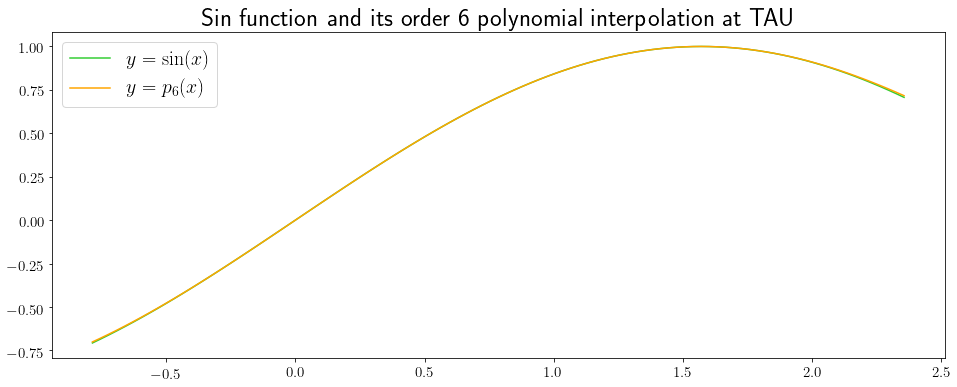

In [7]:
pn = []
X = np.linspace(-np.pi/4, 3*np.pi/4, 101)

for x in X:
    pn.append(div_diff[0][0] + sum([np.prod(x-np.array(TAU)[:i])*div_diff[i][0] for i in range(1, n)]))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
ax.plot(X, np.sin(X), color='limegreen', label=r"$y=\sin(x)$")
ax.plot(X, pn, color='orange', label=r"$y=p_6(x)$")
ax.legend(loc='best', fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_title("Sin function and its order 6 polynomial interpolation at TAU", fontsize=25)
plt.show()

# II. Limitations of polynomial interpolation

### Runge example

In [8]:
def G(x):
    return 1/(1+(5*x)**2)

N = np.arange(2, 22, 2)
arr_err = np.zeros((N.shape[0], 3))

for idxn, n in enumerate(N):
    TAU = np.linspace(-1, 1, n)
    GTAU = G(TAU)
    D = np.copy(GTAU)
    nstep = 100
    
    # Divided differences for Newton form
    # D[i] = [TAU_i, ..., TAU_N]
    for k in range(1, n):
        for i in range(n-k):
            D[i] = (D[i+1]-D[i])/(TAU[i+k]-TAU[i])
            
    errmax = 0
    for i in range(n-1):
        dx = (TAU[i+1]-TAU[i])/(nstep-1)
        for j in range(nstep):
            x = TAU[i] + dx*j
            
            # Evaluate polynomial interpolation by nested multiplication
            pnatx = D[0]
            for k in range(1, n):
                pnatx = D[k] + (x-TAU[k])*pnatx
            
            errmax = max(errmax, abs(G(x)-pnatx))
    loger = np.log(errmax)
    if n>2:
        decay = (loger-logerp)/(np.log(n)-np.log(n-2))
    else:
        decay = 0
    arr_err[idxn][0] = n
    arr_err[idxn][1] = errmax
    arr_err[idxn][2] = decay
    logerp = loger
    
df_err = pd.DataFrame(arr_err, columns=['N','MAX ERR', 'DECAY'])
print(df_err)

      N   MAX ERR     DECAY
0   2.0  0.958994  0.000000
1   4.0  0.706733 -0.440357
2   6.0  0.432597 -1.210575
3   8.0  0.247316 -1.943603
4  10.0  0.300271  0.869483
5  12.0  0.556764  3.386619
6  14.0  1.069978  4.237754
7  16.0  2.107292  5.075704
8  18.0  4.223585  5.903060
9  20.0  8.578193  6.724901


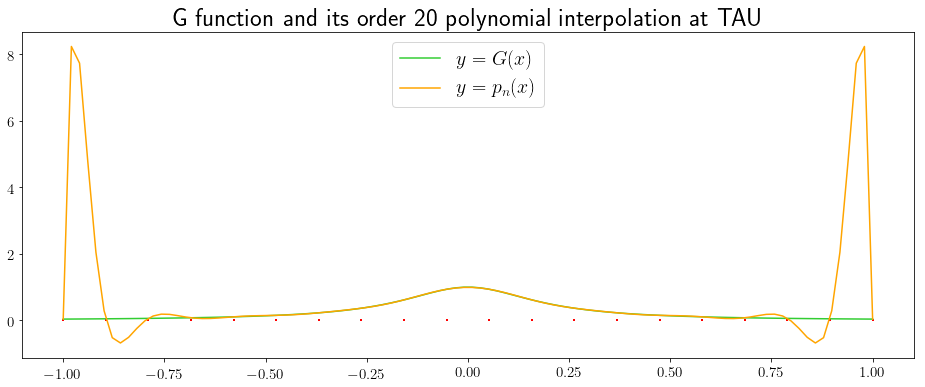

In [9]:
pn = []
X = np.linspace(-1, 1, 100)

for x in X:
    # Evaluate polynomial interpolation by nested multiplication
    pnatx = D[0]
    for k in range(1, n):
        pnatx = D[k] + (x-TAU[k])*pnatx
    pn.append(pnatx)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
ax.plot(X, G(X), color='limegreen', label=r"$y=G(x)$")
ax.plot(X, pn, color='orange', label=r"$y=p_n(x)$")
ax.scatter(TAU, np.zeros(TAU.shape[0]), color='red', marker='+', s=5)
ax.legend(loc='best', fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_title("G function and its order 20 polynomial interpolation at TAU", fontsize=25)
plt.show()

### Runge example with Chebyshev sites

In [10]:
def G(x):
    return 1/(1+(5*x)**2)

N = np.arange(2, 22, 2)
arr_err = np.zeros((N.shape[0], 3))

for idxn, n in enumerate(N):
    TAU = np.zeros(n)
    PIOF2N = np.pi/(2.*n)
    for i in range(n):
        TAU[i] = np.cos((2*i+1)*PIOF2N)
        
    GTAU = G(TAU)
    D = np.copy(GTAU)
    nstep = 100
    
    # Divided differences for Newton form
    # D[i] = [TAU_i, ..., TAU_N]
    for k in range(1, n):
        for i in range(n-k):
            D[i] = (D[i+1]-D[i])/(TAU[i+k]-TAU[i])
            
    errmax = 0
    for i in range(n-1):
        dx = (TAU[i+1]-TAU[i])/(nstep-1)
        for j in range(nstep):
            x = TAU[i] + dx*j
            
            # Evaluate polynomial interpolation by nested multiplication
            pnatx = D[0]
            for k in range(1, n):
                pnatx = D[k] + (x-TAU[k])*pnatx
            
            errmax = max(errmax, abs(G(x)-pnatx))
    loger = np.log(errmax)
    if n>2:
        decay = (loger-logerp)/(np.log(n)-np.log(n-2))
    else:
        decay = 0
    arr_err[idxn][0] = n
    arr_err[idxn][1] = errmax
    arr_err[idxn][2] = decay
    logerp = loger
    
df_err = pd.DataFrame(arr_err, columns=['N','MAX ERR', 'DECAY'])
print(df_err)

      N   MAX ERR     DECAY
0   2.0  0.924652  0.000000
1   4.0  0.749930 -0.302154
2   6.0  0.555748 -0.739066
3   8.0  0.391654 -1.216403
4  10.0  0.269128 -1.681388
5  12.0  0.182727 -2.123671
6  14.0  0.123378 -2.547773
7  16.0  0.083095 -2.960168
8  18.0  0.055899 -3.365734
9  20.0  0.037585 -3.767519


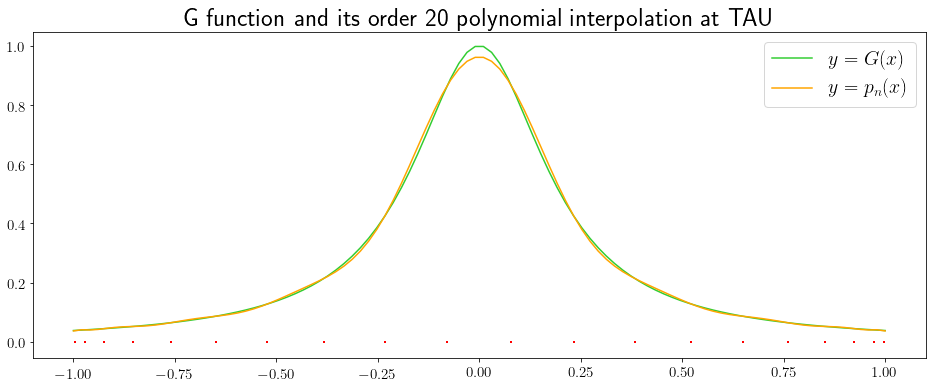

In [11]:
pn = []
X = np.linspace(-1, 1, 100)

for x in X:
    # Evaluate polynomial interpolation by nested multiplication
    pnatx = D[0]
    for k in range(1, n):
        pnatx = D[k] + (x-TAU[k])*pnatx
    pn.append(pnatx)
    
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6))
ax.plot(X, G(X), color='limegreen', label=r"$y=G(x)$")
ax.plot(X, pn, color='orange', label=r"$y=p_n(x)$")
ax.scatter(TAU, np.zeros(TAU.shape[0]), color='red', marker='+', s=5)
ax.legend(loc='best', fontsize=20)
ax.tick_params(axis='both', labelsize=15)
ax.set_title("G function and its order 20 polynomial interpolation at TAU", fontsize=25)
plt.show()

### Squareroot example Chebyshev sites

In [12]:
def G(x):
    return np.sqrt(1+x)

N = np.arange(2, 22, 2)
arr_err = np.zeros((N.shape[0], 3))

for idxn, n in enumerate(N):
    TAU = np.zeros(n)
    PIOF2N = np.pi/(2.*n)
    for i in range(n):
        TAU[i] = np.cos((2*i+1)*PIOF2N)
        
    GTAU = G(TAU)
    D = np.copy(GTAU)
    nstep = 100
    
    # Divided differences for Newton form
    # D[i] = [TAU_i, ..., TAU_N]
    for k in range(1, n):
        for i in range(n-k):
            D[i] = (D[i+1]-D[i])/(TAU[i+k]-TAU[i])
            
    errmax = 0
    for i in range(n-1):
        dx = (TAU[i+1]-TAU[i])/(nstep-1)
        for j in range(nstep):
            x = TAU[i] + dx*j
            
            # Evaluate polynomial interpolation by nested multiplication
            pnatx = D[0]
            for k in range(1, n):
                pnatx = D[k] + (x-TAU[k])*pnatx
            
            errmax = max(errmax, abs(G(x)-pnatx))
    loger = np.log(errmax)
    if n>2:
        decay = (loger-logerp)/(np.log(n)-np.log(n-2))
    else:
        decay = 0
    arr_err[idxn][0] = n
    arr_err[idxn][1] = errmax
    arr_err[idxn][2] = decay
    logerp = loger
    
df_err = pd.DataFrame(arr_err, columns=['N','MAX ERR', 'DECAY'])
print(df_err)

      N   MAX ERR     DECAY
0   2.0  0.079254  0.000000
1   4.0  0.030126 -1.395482
2   6.0  0.019071 -1.127646
3   8.0  0.014044 -1.063547
4  10.0  0.011142 -1.037470
5  12.0  0.009242 -1.025149
6  14.0  0.007900 -1.018030
7  16.0  0.006900 -1.013554
8  18.0  0.006126 -1.010557
9  20.0  0.005508 -1.008455


# IV. Piecewise cubic interpolation

### Runge example

In [13]:
def G(x):
    return 1/(1+(5*x)**2)

N = np.arange(2, 22, 2)
nstep = 100
arr_err = np.zeros((N.shape[0], 3))

for idxn, n in enumerate(N):
    TAU = np.linspace(-1, 1, n)
    C = {k: np.zeros(n) for k in range(4)}
    GTAU = G(TAU)
    for i in range(n):
        C[0][i] = GTAU[i]
        C[1][i] = -50*TAU[i]*C[0][i]**2
    
    # Coefficients of polynomial pieces
    for i in range(n-1):
        dtau = TAU[i+1]-TAU[i]
        divdf1 = (GTAU[i+1]-GTAU[i])/dtau
        divdf3 = C[1][i] + C[1][i+1]-2.*divdf1
        C[2][i] = (divdf1-C[1][i]-divdf3)/dtau 
        C[3][i] = (divdf3/dtau)/dtau
            
    errmax = 0
    for i in range(n-1):
        dx = (TAU[i+1]-TAU[i])/(nstep-1)
        for j in range(nstep):
            h = dx*j            
            # Evaluate polynomial interpolation by nested multiplication
            pnatx = C[0][i] + h*(C[1][i] + h*(C[2][i] + h*C[3][i])) 
            errmax = max(errmax, abs(G(TAU[i]+h)-pnatx))
    loger = np.log(errmax)
    if n>2:
        decay = (loger-logerp)/(np.log(n)-np.log(n-2))
    else:
        decay = 0
    arr_err[idxn][0] = n
    arr_err[idxn][1] = errmax
    arr_err[idxn][2] = decay
    logerp = loger
    
df_err = pd.DataFrame(arr_err, columns=['N','MAX ERR', 'DECAY'])
print(df_err)

      N   MAX ERR     DECAY
0   2.0  0.922016  0.000000
1   4.0  0.540394 -0.770780
2   6.0  0.249923 -1.901874
3   8.0  0.114105 -2.725350
4  10.0  0.055612 -3.220920
5  12.0  0.029314 -3.512062
6  14.0  0.016603 -3.687931
7  16.0  0.009998 -3.798371
8  18.0  0.006338 -3.870350
9  20.0  0.004194 -3.918802


### Adapt program to piecewise cubic bessel interpolation

In [14]:
def G(x):
    return x**3

N = np.arange(4, 22, 2)
nstep = 100
arr_err = np.zeros((N.shape[0], 3))

for idxn, n in enumerate(N):
    TAU = np.linspace(0, 1, n)
    TAU[1] = 2*(TAU[2]-TAU[0])/3
    
    C = {k: np.zeros(n) for k in range(4)}
    GTAU = G(TAU)
    for i in range(n):
        C[0][i] = GTAU[i]
    
    # Prescribed endslopes
    C[1][0] = 3*TAU[0]**2
    C[1][n-1] = 3*TAU[n-1]**2
    
    # Compute interior slopes in cubic Bessel interpolation
    for i in range(1, n-1):
        dtau1 = TAU[i]-TAU[i-1]
        dtau2 = TAU[i+1]-TAU[i]
        divdf1 = (GTAU[i] - GTAU[i-1])/dtau1
        divdf2 = (GTAU[i+1]-GTAU[i])/dtau2
        C[1][i] = (dtau2*divdf1 + dtau1*divdf2)/(dtau2+dtau1)
    
    # Coefficients of polynomial pieces
    for i in range(n-1):
        dtau = TAU[i+1]-TAU[i]
        divdf1 = (GTAU[i+1]-GTAU[i])/dtau
        divdf3 = C[1][i] + C[1][i+1]-2.*divdf1
        C[2][i] = (divdf1-C[1][i]-divdf3)/dtau 
        C[3][i] = (divdf3/dtau)/dtau
            
    errmax = 0
    for i in range(n-1):
        dx = (TAU[i+1]-TAU[i])/(nstep-1)
        for j in range(nstep):
            h = dx*j            
            # Evaluate polynomial interpolation by nested multiplication
            pnatx = C[0][i] + h*(C[1][i] + h*(C[2][i] + h*C[3][i])) 
            errmax = max(errmax, abs(G(TAU[i]+h)-pnatx))
    loger = np.log(errmax)
    if n>2:
        decay = (loger-logerp)/(np.log(n)-np.log(n-2))
    else:
        decay = 0
    arr_err[idxn][0] = n
    arr_err[idxn][1] = errmax
    arr_err[idxn][2] = decay
    logerp = loger
    
df_err = pd.DataFrame(arr_err, columns=['N','MAX ERR', 'DECAY'])
print(df_err)

      N   MAX ERR     DECAY
0   4.0  0.006503  0.632844
1   6.0  0.001405 -3.779553
2   8.0  0.000512 -3.508793
3  10.0  0.000241 -3.378737
4  12.0  0.000132 -3.301925
5  14.0  0.000080 -3.251119
6  16.0  0.000052 -3.214993
7  18.0  0.000036 -3.187975
8  20.0  0.000026 -3.167001


In [15]:
def CUBSPL(TAU, C, n, ibcbeg, ibcend):
    """
    Parameters
    -----------
    n: int
        The number of data points
    TAU, C: list or array
        TAU[i], C[0, i] = Abscissae and ordinates of data points
        C[1, 0], C[1, n-1] = Boundary condition information
    ibcbeg: int
        -- 0 means no boundary conditions at TAU[0] given. In that case a not-a-knot
        condition is used that is a jump in the third derivative is across TAU[1] is forced
        to 0. Thus first and second cubic polynomial pieces are made to coincide.
        -- 1 means that the slope at TAU[0] is made to equal C[1, 0], supplied by input
        -- 2 means that the second derivative at TAU[0] is made to equal C[1, 0], supplied by input
    ibcend: int
        Analagous description to ibcbeg but for TAU[n-1]
        
    Return
    ----------
    C: list
        C[j, i] the polynomial coefficients of the cubic interpolation with interior knots TAU[1], ...,
        TAU[n-2]. Precisely on interval TAU[i], TAU[i+1] the spline f is given by
        f(x) = C[0, i] + H*(C[1, i] + H*(C[2, i] + H*C[3, i]))
        with H = x - TAU[i]
    """
    C = np.concat((np.array(C), np.zeros((2, n))), axis=0)
    
    # A tridiagonal linear system is solved for the unknown slopes of f at TAU[i] i=0,..., n-1
    # is generated and then solved by Gauss elimination
    l = n-1
    
    # Compute first diff and store in C[2, :]
    # Compute second divided diff and store in C[3, :]
    for m in range(1, n):
        C[2, m] = TAU[m] - TAU[m-1]
        C[3, m] = (C[0, m] - C[0, m-1])/C[2, m]
    
    # Construct first equation from boundary condition of the form C[3, 0]*S[0] + C[2, 0]*S[1] = C[1, 0]
    if ibcbeg==0:
        if n==2:
            # No condition at left end and n=2
            C[3, 0]=1
            C[2, 0]=1
            C[1, 0]=2*C[3, 1]
        else:
            # Not-a-knot condition at left end and n>2
            C[3, 0]=C[2, 2]
            C[2, 0]=C[2, 1] + C[2, 2]
            C[1, 0]=((C[2, 1]+2*C[2, 0])*C[3, 1]*C[2, 2]+C[2, 1]**2*C[3,2])/C[2, 0]
    elif ibceg==1:
        # Slope prescribed at left end
        C[3, 0]=1
        C[2, 0]=0
    else:
        # Second derivative prescribed at left end
        C[3, 0]=2
        C[2, 0]=1
        C[1, 0]=3*C[3, 1]-C[2, 1]/2.*C[1, 0]
                    

# VII. A representation for PP functions

In [16]:
def quick_find(x, xt):
    lxt = len(xt)
    if lxt == 1:
        return 0
    else:
        if x < xt[lxt//2]:
            return quick_find(x, xt[:lxt//2])
        else:
            return lxt//2 + quick_find(x, xt[lxt//2:])

def interv(x, xt):
    """
    from  * a practical guide to splines *  by C. de Boor    

    Computes  left = max( i :  xt(i) .lt. xt(lxt) .and.  xt(i) .le. x )  .

    ******  i n p u t  ******
    x.....the point whose location with respect to the sequence  xt  is
            to be determined.
    xt.....a real sequence, of length  lxt , assumed to be nondecreasing

    ******  o u t p u t  ******
    left, mflag.....both integers, whose value is

    0     -1      if             x < xt[0]
    i      0      if   xt[i]  <= x < xt[i+1]
    i      0      if   xt[i]  <  x = xt[i+1] = xt[lxt-1]
    i      1      if   xt[i]  <      xt[i+1] = xt[lxt-1] < x

    In particular,  mflag = 0  is the 'usual' case.  mflag != 0 indicates that 
    x  lies outside the CLOSED interval xt[0] <= y <= xt[lxt-1] . The asymmetric 
    treatment of the intervals is due to the decision to make all pp functions 
    continuous from the right, but, by returning  mflag = 0  even if x = xt[lxt-1], 
    there is the option of having the computed pp function continuous from the left 
    at  xt[lxt-1].
    """
    lxt = len(xt)
    
    if x < xt[0]:
        return (0, -1)
    elif xt[lxt-1] < x:
        return (lxt-1, 1)
    else:
        return (quick_find(x, xt), 0)
    
def ppvalu(ptbreak, coef, x, jderiv):
    """
    from  * a practical guide to splines *  by c. de boor    
    calls  interv
    calculates value at  x  of  jderiv-th derivative of pp fct from pp-repr

    ******  i n p u t  ******
    break, coef, l, k.....forms the pp-representation of the function  f
        to be evaluated. specifically, the j-th derivative of  f  is
        given by

        coef[j, i] = (d**(j-1))f(ptbreak[i]^+)

    (d**j)f(x) = coef(j+1,i) + h*(coef(j+2,i) + h*( ... (coef(k-1,i) +
                             + h*coef(k,i)/(k-j-1))/(k-j-2) ... )/2)/1

        with  h = x - ptbreak[i],  and
        i=max(0, max(j,  ptbreak[j] <= x , 1 <= j <= l)).

    x.....the point at which to evaluate.
    jderiv.....integer giving the order of the derivative to be evaluat-
        ed.  assumed to be zero or positive.

    ******  o u t p u t  ******
      ppvalu.....the value of the (jderiv)-th derivative of  f  at  x.

    ******  m e t h o d  ******
    the interval index  i , appropriate for  x , is found through a
    call to  interv . the formula above for the  jderiv-th derivative
    of  f  is then evaluated (by nested multiplication).
    """
    ptbreak = np.array(ptbreak)
    coef = np.array(coef)
    k, l = coef.shape[0], coef.shape[1]-1
    
    ppvalu = 0.
    fmmjdr = k - jderiv
    if fmmjdr  <=  0.:
        # derivatives of order  k or higher are identically zero.
        ppvalu = 0.
    else:
        # find index  i  of largest breakpoint to the left of  x .
        i, ndummy = interv(x, ptbreak)
        h = x - ptbreak[i]
        m = k
        while fmmjdr > 0:
            ppvalu = (ppvalu/fmmjdr)*h + coef[m-1, i]
            m = m-1
            fmmjdr = fmmjdr - 1.
    return ppvalu

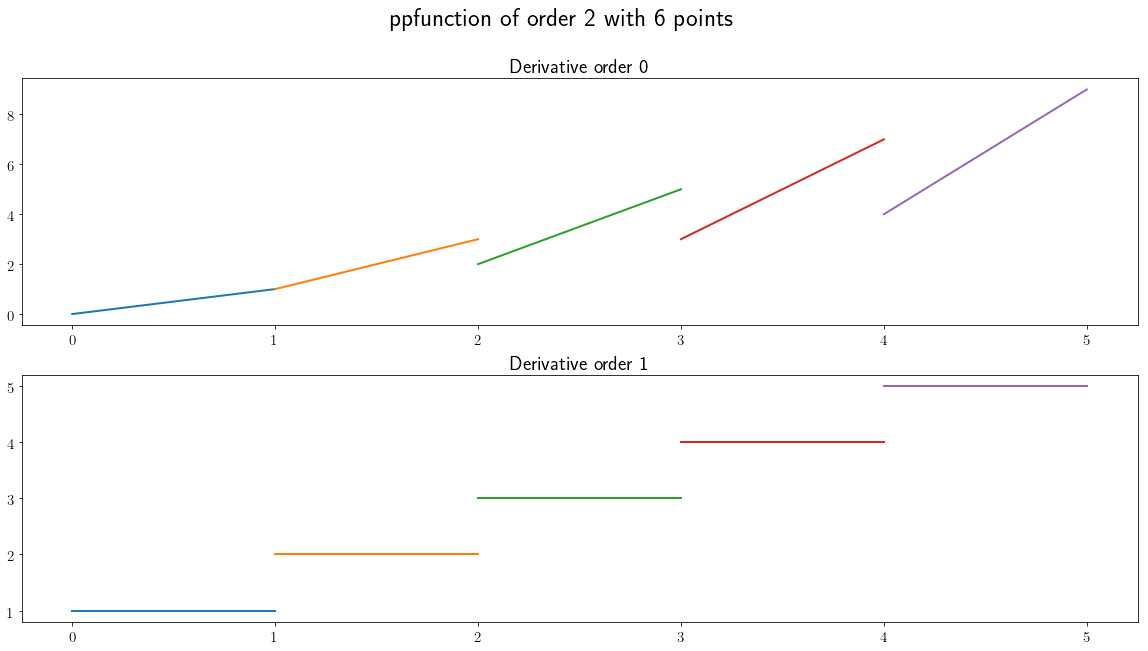

In [17]:
k = 2
l = 5
ptbreak = np.arange(l+1)
coef = np.zeros((k, l+1))

for j in range(k):
    for i in range(l+1):
        coef[j, i] = j+i
        
cmap = cm.get_cmap('tab10')
color = [cmap(i) for i in range(10)]

eps = 1e-6
fig, ax = plt.subplots(nrows=k, ncols=1, figsize=(20, 10))
for j in range(k):
    for i in range(l):
        X = np.linspace(ptbreak[i], ptbreak[i+1]-eps, 100)
        Y = [ppvalu(ptbreak, coef, x, j) for x in X]
        ax[j].plot(X, Y, lw=2, color=color[i])
    ax[j].tick_params(axis='both', labelsize=15)
    ax[j].set_title("Derivative order %d" % j, fontsize=20)
plt.suptitle("ppfunction of order %d with %d points" % (k, l+1), fontsize=25)
plt.show(fig)

In [18]:
def pvalue(xleft, coef, x, jderiv):
    """
    calculates value at  x  of  jderiv-th derivative of fct 

    ******  i n p u t  ******
    xleft, coef, x, jderiv.....forms the pp-representation of the function  f
        to be evaluated. specifically, the j-th derivative of  f  is
        given by

    (d**j)f(x) = coef(j+1,i) + h*(coef(j+2,i) + h*( ... (coef(k-1,i) +
                             + h*coef(k,i)/(k-j-1))/(k-j-2) ... )/2)/1

        with  h = x - xleft

    x.....the point at which to evaluate.
    jderiv.....integer giving the order of the derivative to be evaluat-
        ed.  assumed to be zero or positive.

    ******  o u t p u t  ******
      ppvalu.....the value of the (jderiv)-th derivative of  f  at  x.

    ******  m e t h o d  ******
    the formula above for the  jderiv-th derivative
    of  f  is then evaluated (by nested multiplication).
    """
    coef = np.array(coef)
    k = coef.shape[0]
    
    pvalue = 0.
    fmmjdr = k - jderiv
    if fmmjdr  <=  0.:
        # derivatives of order  k or higher are identically zero.
        pvalue = 0.
    else:
        h = x - xleft
        m = k
        while fmmjdr > 0:
            pvalue = (pvalue/fmmjdr)*h + coef[m-1]
            m = m-1
            fmmjdr = fmmjdr - 1.
    return pvalue

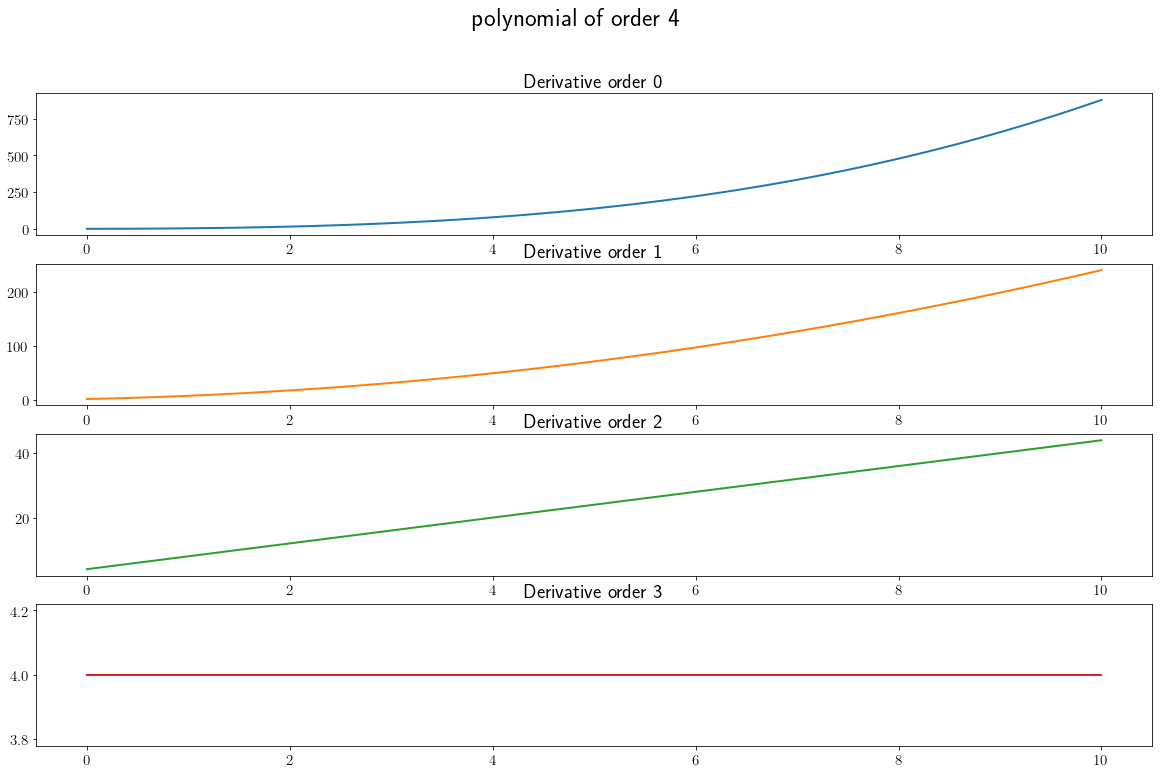

In [12]:
xleft = 0
xright = 10
k = 4
coef = np.zeros(k)
for j in range(k):
    coef[j] = np.random.randint(1, 10)

fig, ax = plt.subplots(nrows=k, ncols=1, figsize=(20, 12))
for j in range(k):
    X = np.linspace(xleft, xright, 100)
    Y = [pvalue(xleft, coef, x, j) for x in X]
    ax[j].plot(X, Y, lw=2, color=color[j])
    ax[j].tick_params(axis='both', labelsize=15)
    ax[j].set_title("Derivative order %d" % j, fontsize=20)
plt.suptitle("polynomial of order %d" % k, fontsize=25)
plt.show(fig)

# IX. The representation of PP functions by B-splines

In [201]:
def TRPOWER(x, k):
    return np.maximum(x, 0)**k

def TRPOWERDERIV(x, k, r):
    if k-r+1 <= 0:
        return 0.
    else:
        if k==r:
            return np.where(x > 0, 1., 0.)
        else:
            return (k-r+1)*np.maximum(x, 0.)**(k-r)

def BSPL(j, k, KNOTS, x):
    KNOTS = np.array(KNOTS)

    # Initialize divided difference
    TAU = KNOTS[j:j+k+1]
    DDIFF = {r: np.zeros(k+1-r) for r in range(k+1)}
    DDIFF[0] = TRPOWER(TAU-x, k-1)

    # Compute until the k+1 th divided difference
    for r in range(1, k+1):
        for l in range(k-r+1):
            if TAU[l+r] == TAU[l]:
                DDIFF[r][l] = TRPOWERDERIV(TAU[l]-x, k-1, r)
            else:
                DDIFF[r][l] = (DDIFF[r-1][l+1]-DDIFF[r-1][l])/(TAU[l+r]-TAU[l])
                
    return DDIFF[k][0]*(TAU[k]-TAU[0])

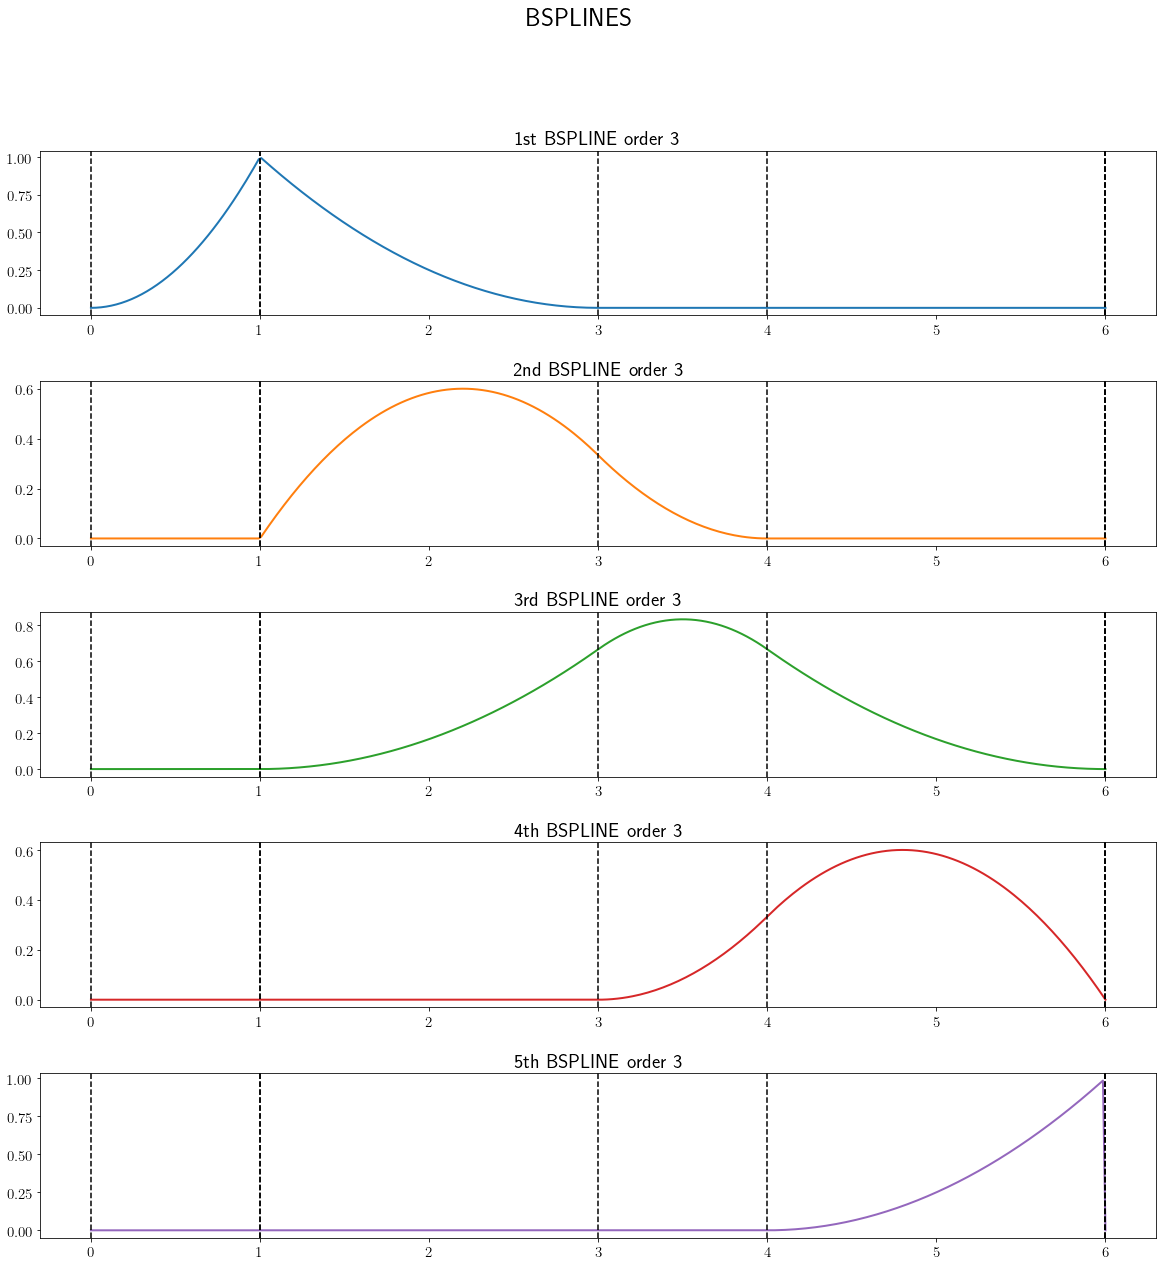

In [209]:
n = 8
k = 3

KNOTS = np.linspace(0, n, n)
KNOTS = [0, 1, 1, 3, 4, 6, 6, 6]

X = np.linspace(KNOTS[0], KNOTS[-1], 400)

fig, ax = plt.subplots(nrows=n-k, ncols=1, figsize=(20, 4*(n-k)))
for j in range(n-k):
    Y = [BSPL(j, k, KNOTS, x) for x in X]
    ax[j].plot(X, Y, lw=2, color=color[j])
    ax[j].tick_params(axis='both', labelsize=15)
    for x in KNOTS:
        ax[j].axvline(x, color='black', ls='--')
    if j==0:
        title = "%dst BSPLINE order %d" % (j+1, k)
    elif j==1:
        title = "%dnd BSPLINE order %d" % (j+1, k)
    elif j==2:
        title = "%drd BSPLINE order %d" % (j+1, k)
    else:
        title = "%dth BSPLINE order %d" % (j+1, k)
    ax[j].set_title(title, fontsize=20)
    
plt.subplots_adjust(hspace=0.4)
plt.suptitle("BSPLINES", fontsize=25)
plt.show(fig)

### IX.2. The cardinal B-splines

In [242]:
from scipy.special import factorial, binom

In [254]:
def CBSPL(j, k, x):
    return sum([(-1)**(k-r)*binom(k, r)*max(j+r-x, 0)**(k-1) for r in range(k+1)])/factorial(k)

### Using special form of cardinal B-splines

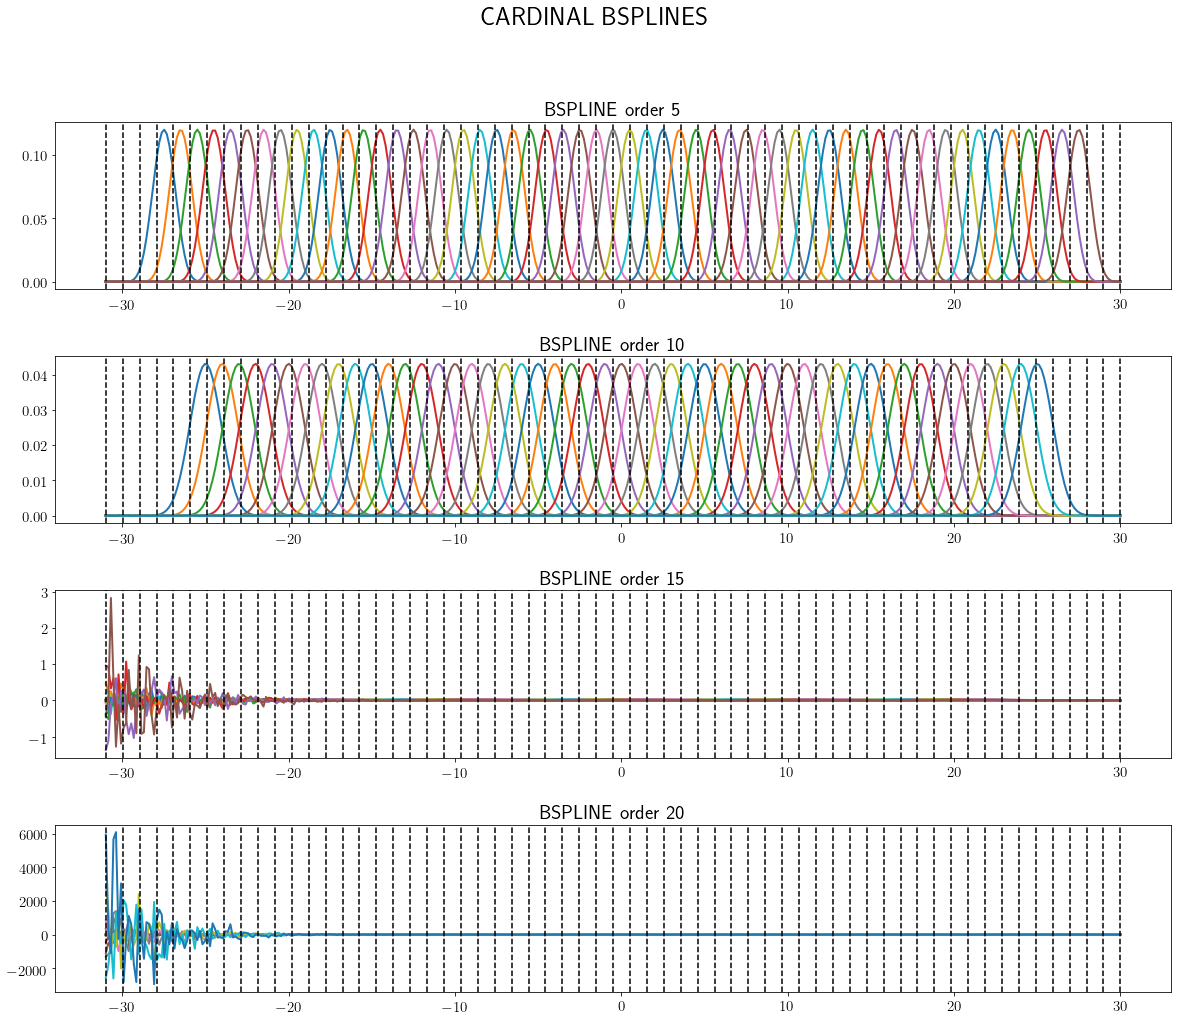

In [256]:
n = 61

KNOTS = np.linspace(-n//2, n//2, n)
X = np.linspace(KNOTS[0], KNOTS[-1], 400)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 4*4))
for i, k in zip(range(4), [5, 10, 15, 20]):
    for j in range(-(n//2), -(n//2)+n-k):            
        Y = [CBSPL(j, k, x) for x in X]
        ax[i].plot(X, Y, lw=2)
    ax[i].tick_params(axis='both', labelsize=15)
    for x in KNOTS:
        ax[i].axvline(x, color='black', ls='--')
    ax[i].set_title("BSPLINE order %d" % k, fontsize=20)
    
plt.subplots_adjust(hspace=0.4)
plt.suptitle("CARDINAL BSPLINES", fontsize=25)
plt.show(fig)

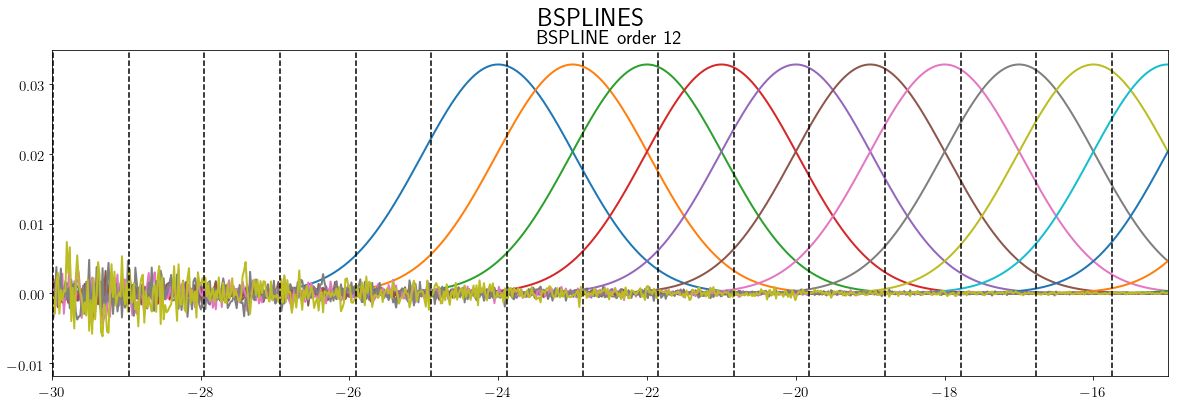

In [257]:
n = 61
k = 12

KNOTS = np.linspace(-n//2, n//2, n)
X = np.linspace(KNOTS[0], -15, 800)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
for j in range(-(n//2), -(n//2)+n-k):            
    Y = [CBSPL(j, k, x) for x in X]
    ax.plot(X, Y, lw=2)
ax.tick_params(axis='both', labelsize=15)
for x in KNOTS:
    ax.axvline(x, color='black', ls='--')
ax.set_title("BSPLINE order %d" % k, fontsize=20) 
ax.set_xlim(-30, -15)

plt.subplots_adjust(hspace=0.4)
plt.suptitle("BSPLINES", fontsize=25)
plt.show(fig)

### Using general form of Bsplines

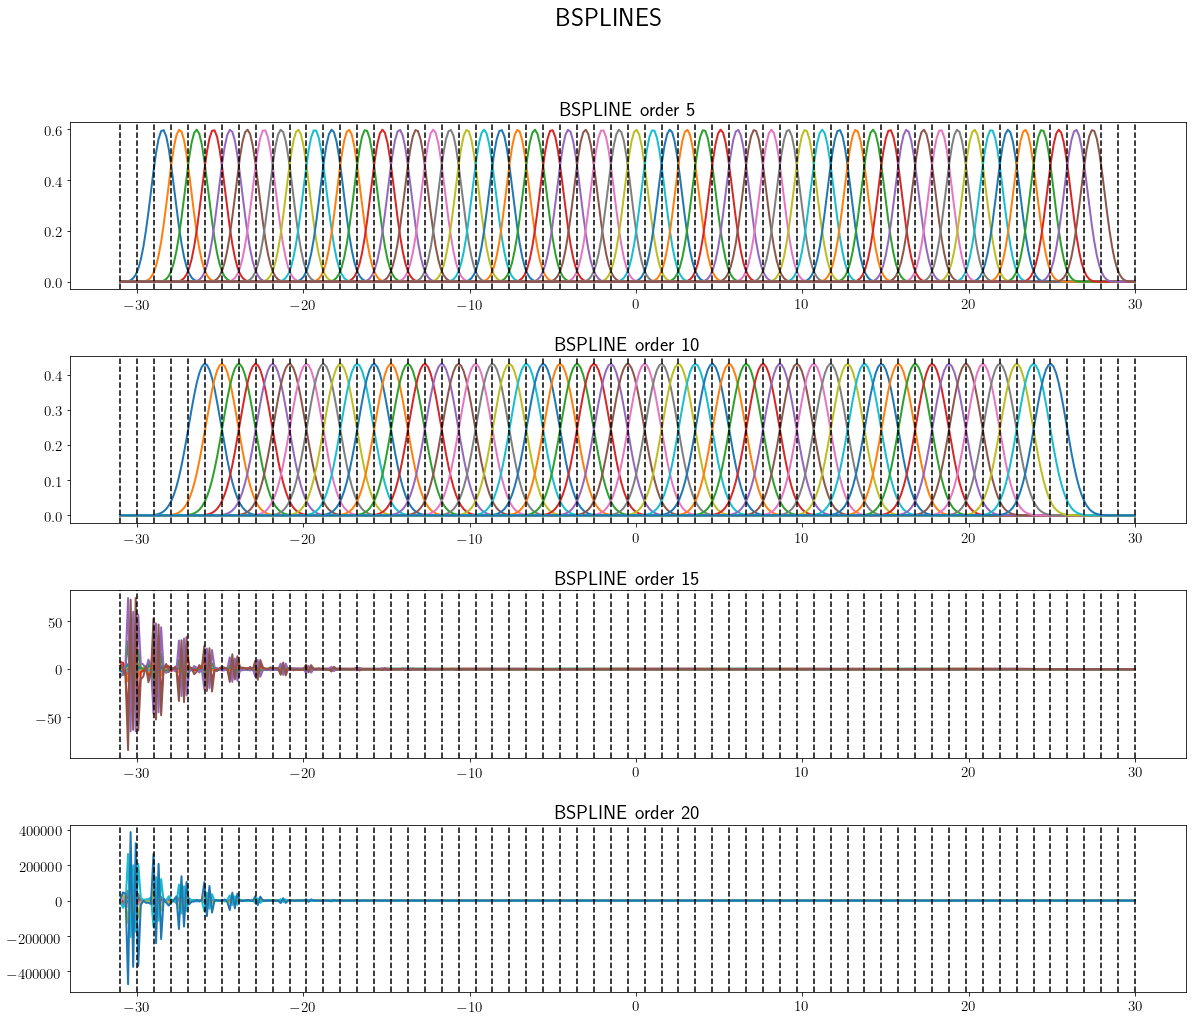

In [224]:
n = 61

KNOTS = np.linspace(-n//2, n//2, n)
X = np.linspace(KNOTS[0], KNOTS[-1], 400)

fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 4*4))
for i, k in zip(range(4), [5, 10, 15, 20]):
    for j in range(n-k):            
        Y = [BSPL(j, k, KNOTS, x) for x in X]
        ax[i].plot(X, Y, lw=2)
    ax[i].tick_params(axis='both', labelsize=15)
    for x in KNOTS:
        ax[i].axvline(x, color='black', ls='--')
    ax[i].set_title("BSPLINE order %d" % k, fontsize=20)
    
plt.subplots_adjust(hspace=0.4)
plt.suptitle("BSPLINES", fontsize=25)
plt.show(fig)

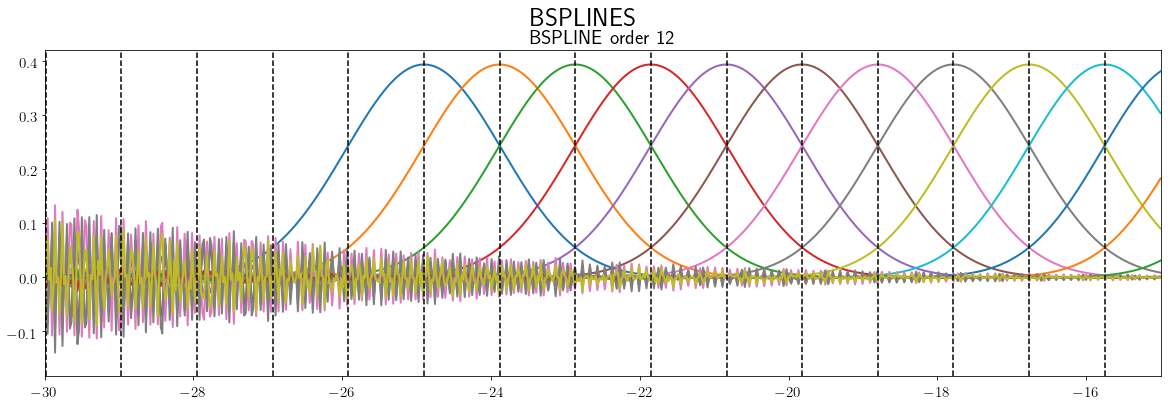

In [237]:
n = 61
k = 12

KNOTS = np.linspace(-n//2, n//2, n)
X = np.linspace(KNOTS[0], -15, 800)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6))
for j in range(n-k):            
    Y = [BSPL(j, k, KNOTS, x) for x in X]
    ax.plot(X, Y, lw=2)
ax.tick_params(axis='both', labelsize=15)
for x in KNOTS:
    ax.axvline(x, color='black', ls='--')
ax.set_title("BSPLINE order %d" % k, fontsize=20) 
ax.set_xlim(-30, -15)

plt.subplots_adjust(hspace=0.4)
plt.suptitle("BSPLINES", fontsize=25)
plt.show(fig)

# X. Stable evaluation of splines and B-splines

In [ ]:
def BSPLVB(j, k, KNOTS, x):
    """
    j: int
        Index in KNOTS at which we start evaluating splines
    k: int
        Order of the Bsplines to be evaluated    
    KNOTS: list or array-like
        List of knots of the B-spline
    x: float
        Point at which to evaluate the splines
    """
    
    
    KNOTS = np.array(KNOTS)

    # Initialize divided difference
    TAU = KNOTS[j:j+k+1]
    DDIFF = {r: np.zeros(k+1-r) for r in range(k+1)}
    DDIFF[0] = TRPOWER(TAU-x, k-1)

    # Compute until the k+1 th divided difference
    for r in range(1, k+1):
        for l in range(k-r+1):
            if TAU[l+r] == TAU[l]:
                DDIFF[r][l] = TRPOWERDERIV(TAU[l]-x, k-1, r)
            else:
                DDIFF[r][l] = (DDIFF[r-1][l+1]-DDIFF[r-1][l])/(TAU[l+r]-TAU[l])
                
    return DDIFF[k][0]*(TAU[k]-TAU[0])